SECOND APRROACH
ALL FEATURES

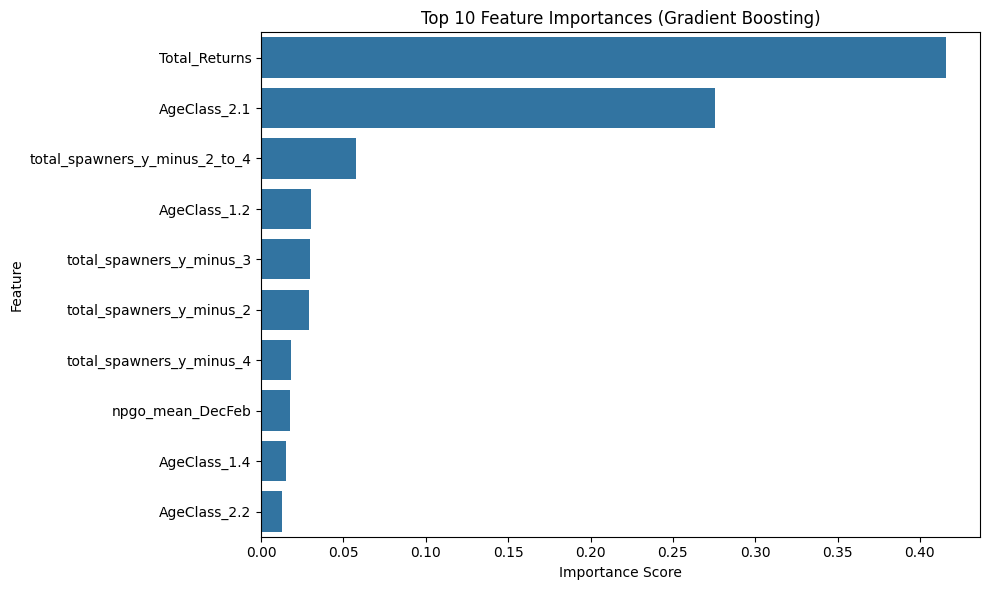

SECOND APPROACH - ALL FEATURES
Gradient Boosting Evaluation Metrics (All Features - Second Approach):
R²   (R-squared test):          0.1627
R²   (R-squared train):         0.9975
MSE  (Mean Squared Error):      19936261469386.47
MAPE (Mean Absolute % Error):   44.73%


In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']
X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train the model
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr.fit(X_train, y_train)

# Step 2: Feature importances (Top 10)
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 3: Predict
y_pred_test = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

# Step 4: Evaluate
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Step 5: Print results
print("SECOND APPROACH - ALL FEATURES")
print("Gradient Boosting Evaluation Metrics (All Features - Second Approach):")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  ALL FEATURES \n"
    "Gradient Boosting:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

# Step 2: Train linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict and evaluate
y_pred_test = model.predict(X_test_poly)
y_pred_train = model.predict(X_train_poly)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Step 4: Print metrics
print("SECOND APPROACH - ALL FEATURES")
print("Polynomial Regression (All Features, Degree=2)")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  ALL FEATURES \n"
    "Polynomial Regression:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


SECOND APPROACH - ALL FEATURES
Polynomial Regression (All Features, Degree=2)
R²   (R-squared test):          -1162.8503
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      27710397213480312.00
MAPE (Mean Absolute % Error):   792.85%


SECOND APPROACH - ALL FEATURES
Linear Regression (All Features)
R²   (R-squared test):          0.1307
R²   (R-squared train):         0.6878
MSE  (Mean Squared Error):      20696362484617.75
MAPE (Mean Absolute % Error):   48.95%


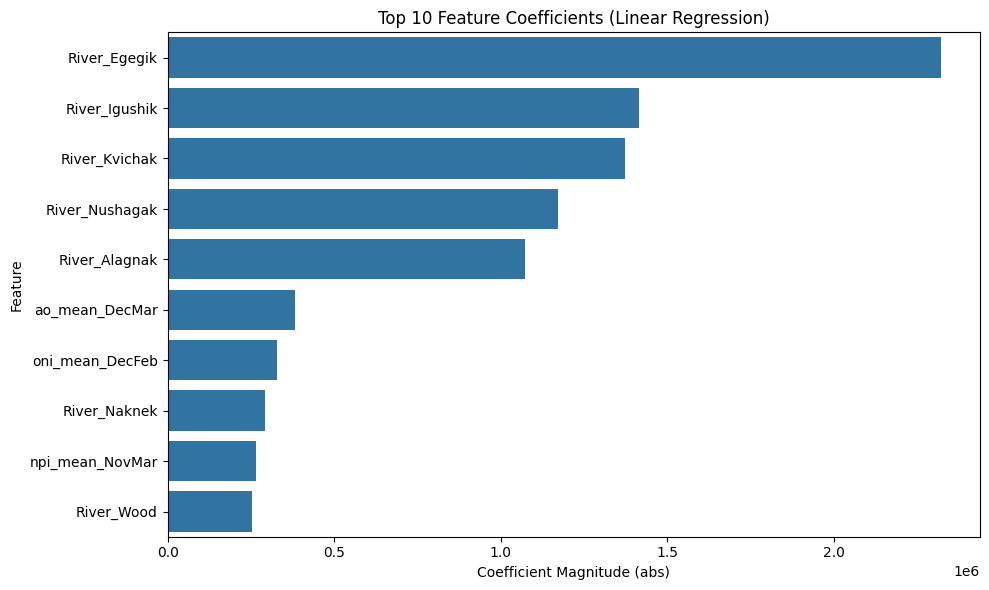

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# Step 1: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Step 3: Evaluate
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Step 4: Print metrics
print("SECOND APPROACH - ALL FEATURES")
print("Linear Regression (All Features)")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Step 5: Visualize top 10 coefficients by magnitude
coef_series = pd.Series(np.abs(model.coef_), index=X_train.columns)
top_10_coef = coef_series.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_coef.values, y=top_10_coef.index)
plt.title("Top 10 Feature Coefficients (Linear Regression)")
plt.xlabel("Coefficient Magnitude (abs)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  ALL FEATURES \n"
    "Linear Regression:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


SECOND APPROACH - ALL FEATURES
Random Forest (All Features)
R²   (R-squared test):          0.3365
R²   (R-squared train):         0.9534
MSE  (Mean Squared Error):      15798473800211.39
MAPE (Mean Absolute % Error):   40.17%


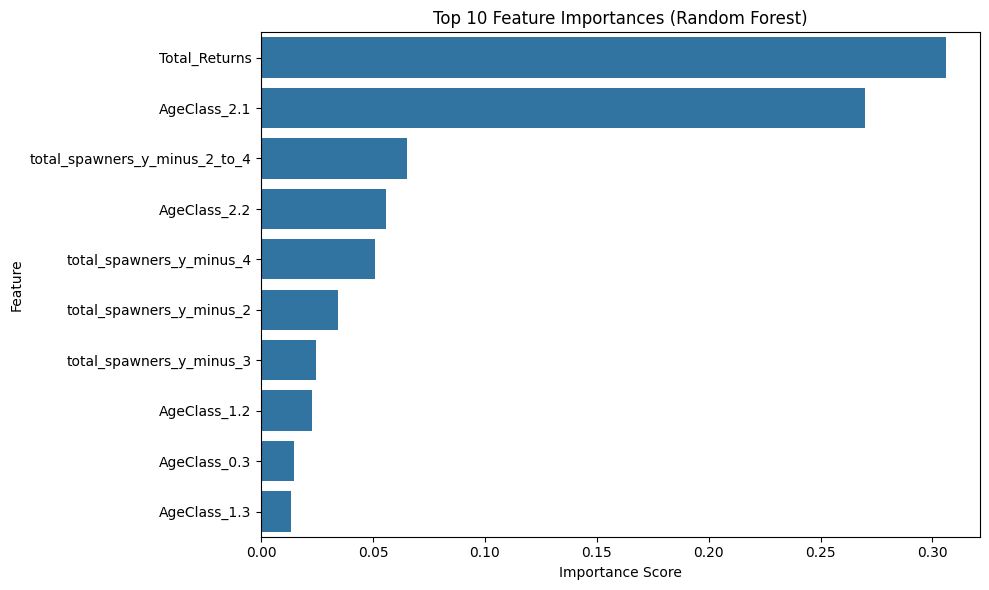

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# Step 1: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Predict
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Step 3: Evaluate
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Step 4: Print metrics
print("SECOND APPROACH - ALL FEATURES")
print("Random Forest (All Features)")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Step 5: Plot top 10 feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  ALL FEATURES \n"
    "Random Forest:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


SECOND APPROACH - ALL FEATURES
XGBoost (All Features)
R²   (R-squared test):          -0.0373
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      24696531534541.34
MAPE (Mean Absolute % Error):   48.36%


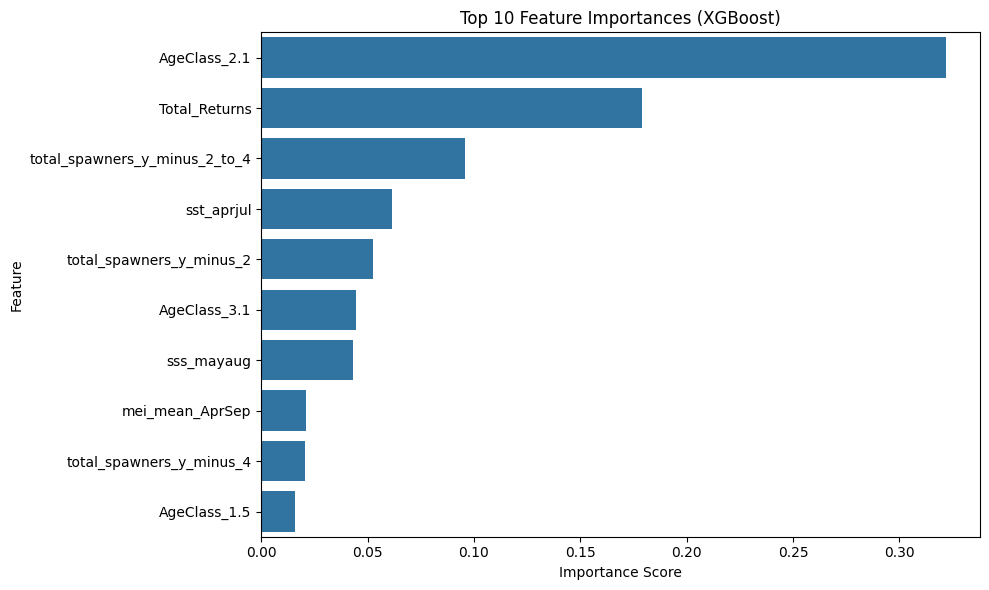

In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# Step 1: Train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

# Step 3: Evaluate
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Step 4: Print results
print("SECOND APPROACH - ALL FEATURES")
print("XGBoost (All Features)")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Step 5: Plot top 10 feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  ALL FEATURES \n"
    "Xbooth:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)
